# Import and Dataset Load

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r'C:\Users\ishan\RevBoost\data\telco_churn.csv')

# Basic checks
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [28]:
# Convert TotalCharges to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any nulls that were introduced
print(df['TotalCharges'].isnull().sum())

11


In [29]:
# Dropping NaN rows since there are only 11 out of 7043 total rows
df = df.dropna(subset=['TotalCharges'])
df.shape  # Should now show (7032, 21)

(7032, 21)

# Convert Types

In [30]:
# Convert target column
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Feature Engineering

In [31]:
# Keep your 4-service version
service_cols_simple = ['PhoneService', 'InternetService', 'OnlineSecurity', 'StreamingTV']
for col in service_cols_simple:
    df[col + '_Flag'] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Fiber optic' else 0)

df['ServicesUsed_Simple'] = df[[col + '_Flag' for col in service_cols_simple]].sum(axis=1)

# Add full count version for ML clustering
service_cols_full = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

df['TotalServicesUsed'] = df[service_cols_full].apply(lambda row: sum(val == 'Yes' for val in row), axis=1)

# Map plan tiers
df['PlanTier'] = df['Contract'].map({
    'Month-to-month': 'Free',
    'One year': 'Basic',
    'Two year': 'Premium'
})

# Drop irrelevant ID column
df.drop(['customerID'], axis=1, inplace=True)

# Visualization

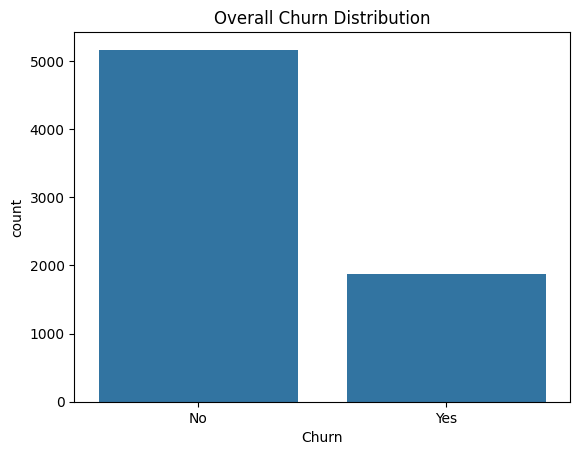

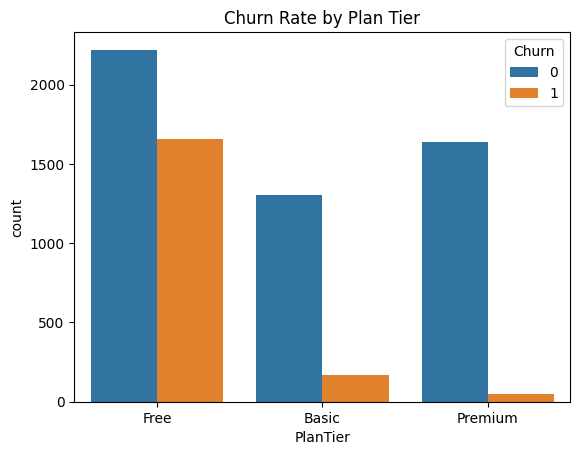

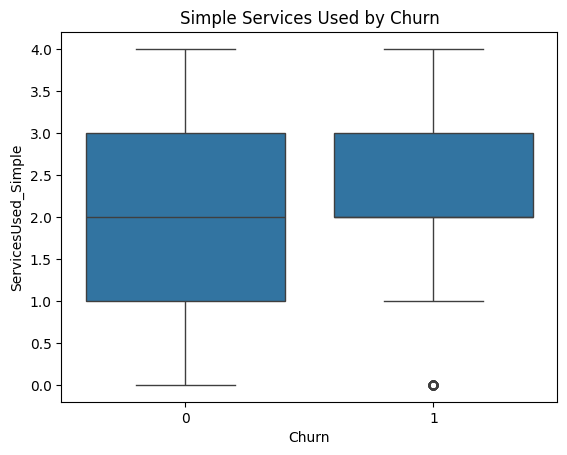

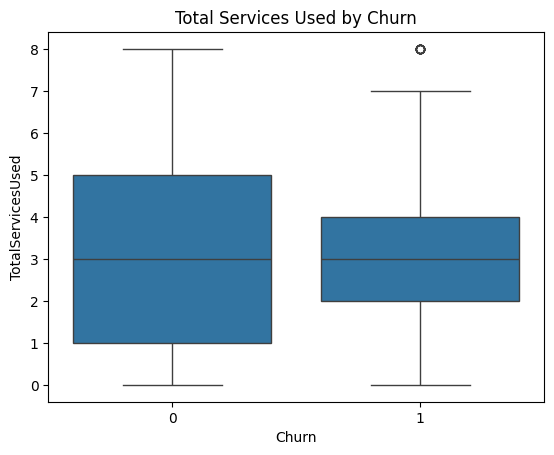

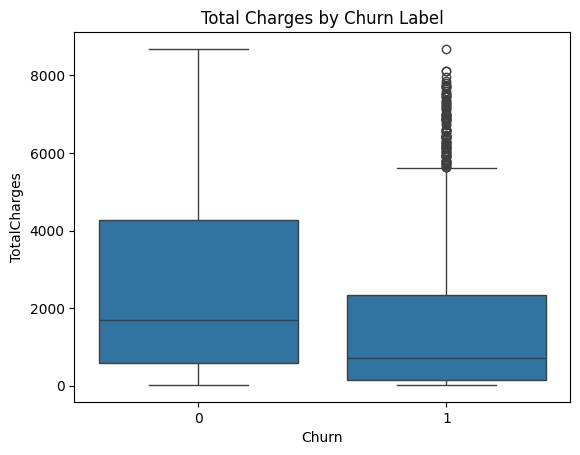

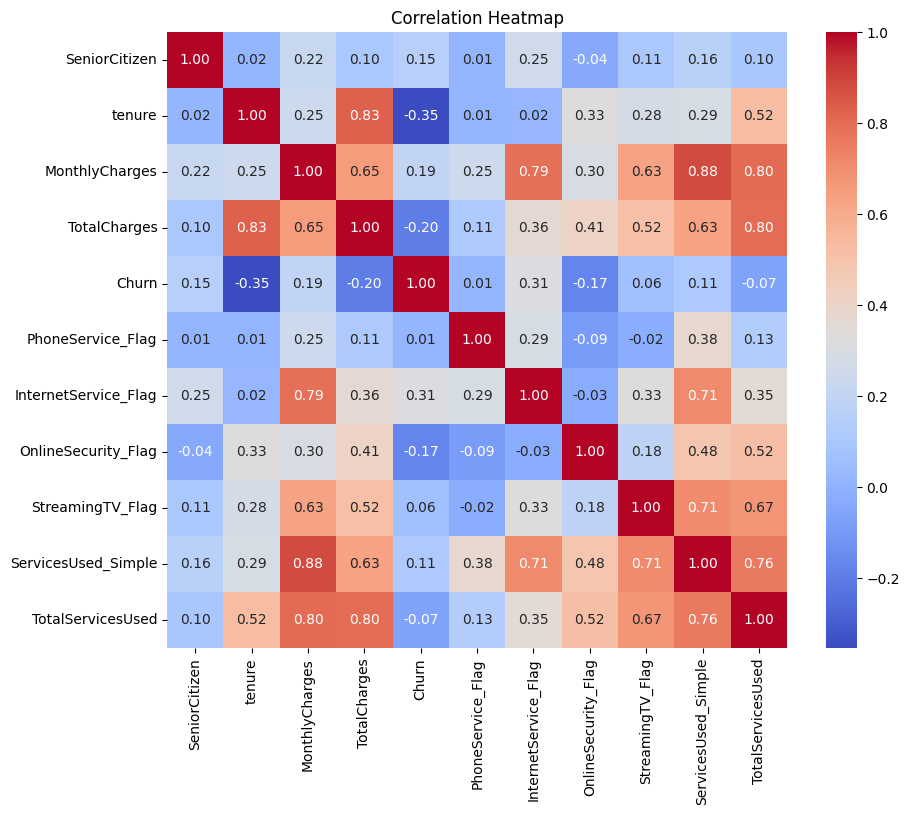

In [32]:
# 1. Overall churn distribution
sns.countplot(data=df, x='Churn')
plt.title("Overall Churn Distribution")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# 2. Churn rate by plan tier
sns.countplot(data=df, x='PlanTier', hue='Churn')
plt.title("Churn Rate by Plan Tier")
plt.show()

# 3. ServicesUsed_Simple vs. Churn (business logic-based)
sns.boxplot(data=df, x='Churn', y='ServicesUsed_Simple')
plt.title("Simple Services Used by Churn")
plt.show()

# 4. TotalServicesUsed vs. Churn (for modeling)
sns.boxplot(data=df, x='Churn', y='TotalServicesUsed')
plt.title("Total Services Used by Churn")
plt.show()

# 5. TotalCharges vs. Churn
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title("Total Charges by Churn Label")
plt.show()

# 6. Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [33]:
# Checking duplicates and null values
print("Duplicates:", df_cleaned.duplicated().sum())
print("Nulls:\n", df_cleaned.isnull().sum())


Duplicates: 0
Nulls:
 gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
PhoneService_Flag       0
InternetService_Flag    0
OnlineSecurity_Flag     0
StreamingTV_Flag        0
ServicesUsed_Simple     0
TotalServicesUsed       0
PlanTier                0
dtype: int64


In [34]:
# Dropping duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
print(df_cleaned.shape)


(7010, 27)


In [35]:
# Saving cleaned dataset
df_cleaned.to_csv('../data/cleaned_telco.csv', index=False)


In [36]:
# Reload cleaned dataset
df_cleaned = pd.read_csv('../data/cleaned_telco.csv')

# Quick checks
df_cleaned.info()
df_cleaned.head()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                7010 non-null   object 
 1   SeniorCitizen         7010 non-null   int64  
 2   Partner               7010 non-null   object 
 3   Dependents            7010 non-null   object 
 4   tenure                7010 non-null   int64  
 5   PhoneService          7010 non-null   object 
 6   MultipleLines         7010 non-null   object 
 7   InternetService       7010 non-null   object 
 8   OnlineSecurity        7010 non-null   object 
 9   OnlineBackup          7010 non-null   object 
 10  DeviceProtection      7010 non-null   object 
 11  TechSupport           7010 non-null   object 
 12  StreamingTV           7010 non-null   object 
 13  StreamingMovies       7010 non-null   object 
 14  Contract              7010 non-null   object 
 15  PaperlessBilling     

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,PhoneService_Flag,InternetService_Flag,OnlineSecurity_Flag,StreamingTV_Flag,ServicesUsed_Simple,TotalServicesUsed
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.162767,32.520399,64.888666,2290.353388,0.264907,0.902996,0.440799,0.287447,0.385592,2.016833,3.370756
std,0.369180,24.520441,30.064769,2266.820832,0.441315,0.295985,0.496518,0.452604,0.486770,1.026265,2.061039
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.750000,408.312500,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,29.000000,70.400000,1403.875000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,0.000000,56.000000,89.900000,3807.837500,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.000000
